In [61]:
import pandas as pd
from sklearn import metrics
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df_final = pd.read_csv('combined.csv')
df_final.head()

,image_name,hair_annotations_Laurits,pen_marks_annotations_Laurits,hair_annotations_harini,pen_marks_annotations_harini,hair_annotations_Grossu,pen_marks_annotations_Grossu,hair_dumitru_anotations,pen_marks_dumitru_anotations
0,PAT_1036_169_687.png,0,0,1,0,0,0,0,0
1,PAT_104_1755_320.png,0,0,0,1,0,0,0,0
2,PAT_1062_264_741.png,0,0,0,0,0,0,0,0
3,PAT_1064_272_668.png,1,0,1,0,1,0,1,0
4,PAT_1064_273_980.png,0,0,0,0,0,0,0,0


### Weighted Cohen's kappa - for hair annotations

In [63]:
annotators = ['annotations_Laurits', 'annotations_harini', 'annotations_Grossu', 'dumitru_anotations']
total_h = 0
reps_h = 0
for a, b in combinations(annotators, 2):
    score = round(metrics.cohen_kappa_score(df_final['hair_'+a], df_final['hair_'+b], weights='linear'), 4)
    total_h += score
    reps_h +=1
    print(f'{score} agreement between {a} and {b}')

print(f"Average agreement for the degree of hair presence: { round(total_h / reps_h, 4)}")

0.7278 agreement between annotations_Laurits and annotations_harini
0.9579 agreement between annotations_Laurits and annotations_Grossu
0.7844 agreement between annotations_Laurits and dumitru_anotations
0.7129 agreement between annotations_harini and annotations_Grossu
0.7327 agreement between annotations_harini and dumitru_anotations
0.7663 agreement between annotations_Grossu and dumitru_anotations
Average agreement for the degree of hair presence: 0.7803


### Cohen's kappa - for pen annotations

In [64]:
annotators = ['annotations_Laurits', 'annotations_harini', 'annotations_Grossu', 'dumitru_anotations']
total_p = 0
reps_p = 0
for a, b in combinations(annotators, 2):
    score = round(metrics.cohen_kappa_score(df_final['pen_marks_'+a], df_final['pen_marks_'+b]), 4)
    total_p += score
    reps_p +=1
    print(f'{score} agreement between {a} and {b}')

print(f"Average agreement regarding pen marks: { round(total_p / reps_p, 4)}")


0.8191 agreement between annotations_Laurits and annotations_harini
0.9724 agreement between annotations_Laurits and annotations_Grossu
0.8915 agreement between annotations_Laurits and dumitru_anotations
0.7902 agreement between annotations_harini and annotations_Grossu
0.8708 agreement between annotations_harini and dumitru_anotations
0.8622 agreement between annotations_Grossu and dumitru_anotations
Average agreement regarding pen marks: 0.8677


### As it can be seen, the cohen's kappa shows a substantial level of agreement for the hair annotations, whilst there is almost a perfect agreement when it comes to pen marks. Annotating hair--- subjective, annotating pen_marks is more unambiguous

### Some insights about the data

In [65]:
hair_cols = df_final.loc[:, df_final.columns.str.contains('hair')]
pen_cols = df_final.loc[:, df_final.columns.str.contains('pen')]

row_hair_means = hair_cols.mean(axis=1).round().astype('Int32') #### taking the mean of all the annotations for insights
row_pen_means = pen_cols.mean(axis=1).round().astype('Int32') ### keeping the annotations as integers

row_hair_means.value_counts()



0    68
1    30
2    13
3     5
Name: count, dtype: Int64

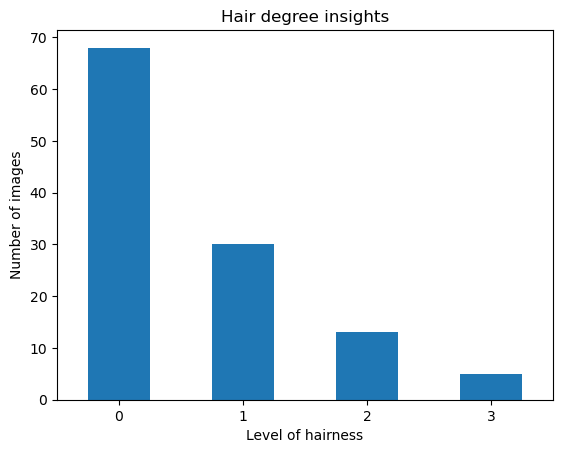

In [66]:
row_hair_means.value_counts().plot(kind='bar')

plt.ylabel("Number of images")
plt.title("Hair degree insights")
plt.xlabel("Level of hairness")
plt.xticks(rotation = 0)
plt.show()

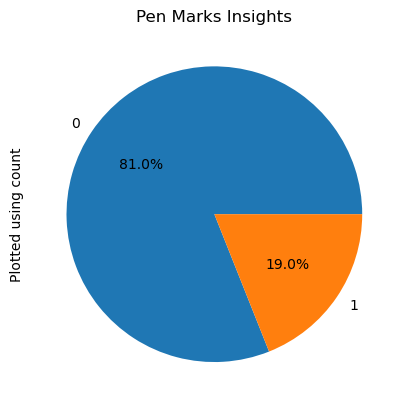

In [67]:
row_pen_means.value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title("Pen Marks Insights")
plt.ylabel('Plotted using count')

plt.show()

## Final Conclusions based on the insights:

#### 1. Regarding hair coverage levels:
    Most of the images were annotated with a low degree of hair coverage. This could benefit the future training of the model. However, some decisions should be made regarding the images at level 2-3.

#### 2. Regarding Pen Marks
    Almost 1/5 of the images have pen marks, which could also affect the model performance.

#### 3. Inter-annotator agreement
    Inter-annotator agreement, as measured by Cohen’s kappa, showed substantial agreement for hair coverage and almost perfect agreement for pen mark detection. Evaluating hair coverage is subjective, while identifying pen marks is more unambiguous, and in my opinion that is the reason for which there is more agreement regarding pen marks.
    